## **PART 1**
#### Building Scrapers
#### **CHAPTER 1**
#### Your First Web Scraper


*   Basics of sending GET request to web server
*   Reading HTML output from the page
*   Data extraction to isolate content we are looking for



#### Connecting

In [ ]:
# text-wrap for notebook output
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
from urllib.request import urlopen
html=urlopen('https://pythonscraping.com/pages/page1.html')
print(html.read())

b'<html>\n<head>\n<title>A Useful Page</title>\n</head>\n<body>\n<h1>An Interesting Title</h1>\n<div>\nLorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n</div>\n</body>\n</html>\n'


#### An Introduction to BeautifulSoup

*  from request module from urllib library import urlopen
*  Get HTML content by calling html.read()
*  Transform HTML content to BeautifulSoup object

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen("http://www.pythonscraping.com/pages/page1.html")
bsObj=BeautifulSoup(html.read())
print(bsObj.h1)

# query below also creates the same output
'''
bsObj.html.body.h1
bsObj.body.h1
bsObj.html.h1
'''

<h1>An Interesting Title</h1>


In [ ]:
print(bsObj)

<html>
<head>
<title>A Useful Page</title>
</head>
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
</body>
</html>



#### Connecting Reliably
*  prevent code execution from stopping unexpectedly
*  make sure page can be found
*  server can be found

In [ ]:
# handle page not found, print out HTTP error
from urllib.request import urlopen
from urllib.error import HTTPError
try:
    html=urlopen('http://www.pythonscraping.com/pages/NO_SUCH_PAGE.html')
except HTTPError as e:
    print(e)

HTTP Error 404: Not Found


In [ ]:
# handle site not found
if html is None:
    print('URL is not found')
else:
    # program continues

In [ ]:
# handle non existing tag
'''
if AttributeError is returned means nonExistingTag doesn't have this tag OR 
nonExistingTag is a None object
''' 
try:
    badContent=bsObj.nonExistingTag.anotherTag
except AttributeError as e:
    print('Tag was not found')
else:
    if badContent==None:
        print('Tag was not found')
    else:
        print(badContent)

In [ ]:
# Comprehensive query which takes in Exceptions into account

from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup
def getTitle(url):
    try:
        html=urlopen(url)
    except HTTPError as e:
        return None
    try:
        bsObj=BeautifulSoup(html.read())
        title=bsObj.body.h1
    except AttributeError as e:
        return None
    return title
title=getTitle("http://www.pythonscraping.com/pages/page1.html")
if title == None:
    print("Title could not be found")
else:
    print(title)


<h1>An Interesting Title</h1>


#### **CHAPTER 2**
#### Advanced HTML Parsing

#### Things to avoid
*  What if targe content is buried 20 tags deep in HTML?  
*  Avoid writing very specific which might break with the slightest change to the website  
*  What are the options?  
    * Look for "print this page" link/ mobile version of the site
    * Look for hidden info in JavaScript file
    * info might be available in URL itself
    * look for alternate sources


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen("http://www.pythonscraping.com/pages/warandpeace.html")
bsObj=BeautifulSoup(html)

In [ ]:
# findAll to find all the span tags with class='green'
# get_text() to get the text portion of the tag
nameList=bsObj.findAll("span",{"class":"green"})
for name in nameList:
    print(name.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


#### find () and findAll()
*  findAll(tag, attributes, recursive, text, limit, keywords)  
*  find(tag, attributes, recursive, text, keywords)
*  tag: tag name
*  attribute: attribute of the tag
*  recursivee: boolean; True=look into chilcren and children's children, if False=look into top-level tags
*  text: match based on text content of the tags
*  limit: only for findAlll(); gives the first items on the page in order that they occur
*  keyword: select tag that contains particular attribute
* Note: attribute list is an 'or' filter whilst keyword is an 'and' filter

In [ ]:
# use of keyword
# this will give nonstandard use of class error because class is a protected keyword
bsObj.findAll(class='green') 

# instead use underscore
bsObj.findAll(class_='green')

# alternatively
bsObj.findAll("",{"class":"green"})

#### Other BeautifulSoup Objects
*  BeautifulSoup objects: bsObj
*  Tag objects: retrieve through find/findAll
*  NavigableString objects: represent text withing tags
*  Comment object: HTML comments

#### Navigating Trees
* findAll find tags based on their name and attribute
* how to find tag based on their location in the document? Use tree navigation

#### Dealing with children and other descendants
* Children: one tag below a parent
* Decendants: any level in the tree below a parent
* findAll() finds descendant
* .children finds children


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj=BeautifulSoup(html)

for child in bsObj.find("table",{"id":"giftList"}).children:
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


#### Dealing with siblings
* use next_sibling to get the next object
* previous_sibling is the opposite of next_sibling

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj=BeautifulSoup(html)

for sibling in bsObj.find("table",{"id":"giftList"}).tr.next_siblings:
    print(sibling)



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

#### Dealing with your parents
* parent-finding functions :
    * .parent
    * .parents

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html=urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj=BeautifulSoup(html)
print(bsObj.find("img",{"src":"../img/gifts/img1.jpg"
                       }).parent.previous_sibling.get_text())


$15.00



Explanation for query above:
1. image tag where src="../img/gifts/img1.jpg" is selected
2. parent of that image tag; td
3. previous_sibling of the parent td tag
4. get_text() on the sibling td tag

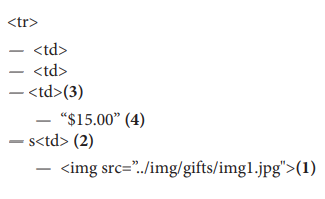

#### Regular expression (REGEX)
Examples below:
* aa* : a then a* (any number of a including 0)
* bbbb : five b's in a row
* (cc)* : any number of pairs of c's, including 0
* (d|): d or a space


Identifying email address: 
* Rule 1:  
    * First part contains at leas one of the following:
        * uppercase letters
        * lowercase letters
        * numbers 0-9
        * periods (.)
        * plus signs (+)
        * underscores (_)  

    * REGEX: [A-Za-z0-9\._+]+

* Rule 2:
    * contains @
    * REGEX: @

* Rule 3:
    * contains at least one uppercase and lowercase letter
    * REGEX: [A-Za-z]+
* Rule 4:
    * followed by a period (.)
    * REGEX: \.
* Rule 5:
    * Ends with:
        * .com
        * .org
        * .edu
        * .net
    * REGEX: (com|org|edu|net)


Concatenating all rules:
[A-Za-z0-9\._+\]+@[A-Za-z]+\.(com|org|edu|net)

#### Regular Expression and BeautifulSoup


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

html=urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj=BeautifulSoup(html)
images=bsObj.findAll("img",{"src":re.compile("\.\./img\/gifts/img.*\.jpg")})
for image in images:
    print(image["src"])

../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


#### Accessing Attributes
* to get attribute of a tag: myTag.attrs
* Example:
to get the source location for an image
myImgTag.attrs

#### Lambda Expressions
* BeautifulSoup allows certain types of functions to be pass as parameters into findAll function
* Example:  
soup.findAll(lambda tag: len(tag.attrs) == 2)
* Explanation: 
find all tags that have 2 attributes

#### Beyond Beautifulsoup
There are other libraries other than BS: 
* lxml
* HTML Parser


#### *CHAPTER 3*
#### Starting to Crawl

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html=urlopen("http://en.wikipedia.org/wiki/Kevin_Bacon")
bsObj=BeautifulSoup(html)
for link in bsObj.findAll("a"):
    if 'href' in link.attrs:
        print(link.attrs['href'])


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html=urlopen("http://en.wikipedia.org/wiki/Kevin_Bacon")

In [ ]:
bsObj=BeautifulSoup(html)
import re

In [ ]:
links=bsObj.find("div",{"id":"bodyContent"}).findAll("a",href=re.compile("^(/wiki/)((?!:).)*$"))


In [ ]:
for link in links:
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Kevin_Bacon_(disambiguation)
/wiki/Philadelphia,_Pennsylvania
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Holly_Near
/wiki/Footloose_(1984_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Balto_(film)
/wiki/Sleepers
/wiki/The_Woodsman_(2004_film)
/wiki/Animal_House
/wiki/Diner_(1982_film)
/wiki/Tremors_(1990_film)
/wiki/Crazy,_Stupid,_Love
/wiki/Friday_the_13th_(1980_film)
/wiki/Flatliners
/wiki/The_River_Wild
/wiki/Wild_Things_(film)
/wiki/Stir_of_Echoes
/wiki/Hollow_Man
/wiki/Frost/Nixon_(film)
/wiki/Black_Mass_(film)
/wiki/Patriots_Day_(film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/HBO
/wiki/Taking_Chance
/wiki/Golden_Globe_Award
/wiki/Screen_Actors_Guild_Award
/wiki/Primetime_Emmy_Award
/wiki/Streaming_television
/wiki/I_Love_Dick_(TV_series)
/wiki/Golden_Globe_Award_for_Best_Actor_%E2%80%93_Television_Series_Musical_or_Comedy
/wiki/The_Guardian
/wi

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

html=urlopen("http://en.wikipedia.org/wiki/Kevin_Bacon")
bsObj=BeautifulSoup(html)
for link in bsObj.find("div",{"id":"bodyContent"}).findAll("a",
                        href=re.compile("^(/wiki/)((?!:).)*$")):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Kevin_Bacon_(disambiguation)
/wiki/Philadelphia,_Pennsylvania
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Holly_Near
/wiki/Footloose_(1984_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Balto_(film)
/wiki/Sleepers
/wiki/The_Woodsman_(2004_film)
/wiki/Animal_House
/wiki/Diner_(1982_film)
/wiki/Tremors_(1990_film)
/wiki/Crazy,_Stupid,_Love
/wiki/Friday_the_13th_(1980_film)
/wiki/Flatliners
/wiki/The_River_Wild
/wiki/Wild_Things_(film)
/wiki/Stir_of_Echoes
/wiki/Hollow_Man
/wiki/Frost/Nixon_(film)
/wiki/Black_Mass_(film)
/wiki/Patriots_Day_(film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/HBO
/wiki/Taking_Chance
/wiki/Golden_Globe_Award
/wiki/Screen_Actors_Guild_Award
/wiki/Primetime_Emmy_Award
/wiki/Streaming_television
/wiki/I_Love_Dick_(TV_series)
/wiki/Golden_Globe_Award_for_Best_Actor_%E2%80%93_Television_Series_Musical_or_Comedy
/wiki/The_Guardian
/wi

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random
import re

random.seed(datetime.datetime.now())
def getLinks(articleUrl):
    html=urlopen("http://en.wikipedia.org"+articleUrl)
    bsObj=BeautifulSoup(html)
    return bsObj.find("div",{"id":"bodyContent"}).findAll("a",href=re.compile("^(/wiki/)((?!:).)*$"))
links=getLinks("/wiki/Kevin_Bacon")
while len(links)>0:
    newArticle=links[random.randint(0,len(links)-1)].attrs["href"]
    print(newArticle)
    links=getLinks(newArticle)

/wiki/Kevin_Bacon_(disambiguation)
/wiki/Kevin_Bacon_(producer)
/wiki/Sugababes
/wiki/SoundCloud
/wiki/Funny_or_Die
/wiki/Jessica_Alba
/wiki/Robert_De_Niro
/wiki/Dave_Brubeck
/wiki/Ron_Crotty
/wiki/Berkeley,_California
/wiki/Inland_Empire
/wiki/Cajon_Pass
/wiki/Washington,_D.C.
/wiki/Mayor_of_the_District_of_Columbia
/wiki/Political_party_strength_in_Washington,_D.C.
/wiki/District_of_Columbia_Organic_Act_of_1801
/wiki/Initiatives_and_referendums_in_the_District_of_Columbia
/wiki/Statehood_movement_in_the_District_of_Columbia
/wiki/United_States_Capitol
/wiki/George_Washington_(Houdon)
/wiki/Statue_of_William_Allen
/wiki/Statue_of_Roger_Sherman
/wiki/Jefferson_Memorial#Exterior
/wiki/Statue_of_Abraham_Lincoln_(Hodgenville,_Kentucky)
/wiki/Lincoln%27s_House_Divided_Speech
/wiki/Columbus,_Ohio
/wiki/Horizon_Science_Academy_Columbus_High_School
/wiki/Ohio_State_School_for_the_Blind
/wiki/Missouri_Academy_of_Science,_Mathematics_and_Computing
/wiki/Pittsburg_State_Gorillas
/wiki/Pittsburg_

KeyboardInterrupt: ignored

#### Crawling an Entire Site
Usage:
1. Generating a site map
2. Gathering data

How?
1. start crawl with top-level page (home page)
2. search for list of all internal links on that page
3. crawl each of those links
4. when crawling additional links are found, crawl those too
5. avoid crawling same page twice as those links might be duplicates
6. crawl only "new" links

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

pages=set()
def getLinks(pageUrl):
    global pages
    html=urlopen("http://en.wikipedia.org"+pageUrl)
    bsObj=BeautifulSoup(html)
    for link in bsObj.findAll("a",href=re.compile("^(/wiki/)")):
        if 'href' in link.attrs:
            if link.attrs['href'] not in pages:
                # We have encountered a new page
                 newPage = link.attrs['href']
                 print(newPage)
                 pages.add(newPage)
                 getLinks(newPage)
getLinks("")

Explanation:
1. getLinks("") starts the function with empty URL which is the wiki front page
2. each link in this front page is iterated through to check if its in the global set of pages
3. If not, it is added to the list and printed to screen
4. getLinks is then called recursively on it

#### Collecting Data Across an Entire Site
Lets try:
1. *collect the title*  
titles under 1h -> span tags
2. *the first paragraph of the content*  
all body text is under div#bodyContent tag.  
to specify just the first paragraph of text, div#mv-content-text->p (select 1st paragraph tag only)
3. *link to edit the page (if available)*  
only occur in article page  
li#ca-eidt tag under li#ca-edit-> span-> a



In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

pages=set()
def getLinks(pageUrl):
    global pages
    html=urlopen("http://en.wikipedia.org"+pageUrl)
    bsObj=BeautifulSoup(html)
    try:
        print(bsObj.h1.get_text())
        print(bsObj.find(id="mw-content-text").findAll("p")[0])
        print(bsObj.find(id="ca-edit").find("span").find("a").attrs['href'])
    except AttributeError:
        print("This page is missing something! No worries though!")
    
    for link in bsObj.findAll("a", href=re.compile("^(/wiki/)")):
        if link.attrs['href'] not in pages:
            #new page encountered
            newPage=link.attrs['href']
            print("--------------\n"+newPage)
            pages.add(newPage)
            getLinks(newPage)
getLinks("")

Main Page
<p>The <b><a href="/wiki/Sega_CD" title="Sega CD">Sega CD</a></b> is a <a href="/wiki/CD-ROM" title="CD-ROM">CD-ROM</a> accessory for the <a href="/wiki/Sega_Genesis" title="Sega Genesis">Genesis</a> (also known as Mega Drive), produced by <a href="/wiki/Sega" title="Sega">Sega</a> as part of the <a href="/wiki/Fourth_generation_of_video_game_consoles" title="Fourth generation of video game consoles">fourth generation of video game consoles</a>. It was released on December 12, 1991, in Japan, in 1992 in North America, and in 1993 in Europe. It plays <a href="/wiki/Compact_disc" title="Compact disc">CD</a>-based games and adds hardware functionality such as a faster <a href="/wiki/Central_processing_unit" title="Central processing unit">central processing unit</a> and graphic enhancements such as <a href="/wiki/Sprite_(computer_graphics)" title="Sprite (computer graphics)">sprite</a> scaling and rotation. It also plays audio CDs and <a href="/wiki/CD%2BG" title="CD+G">CD+G</a>

KeyboardInterrupt: ignored

#### Crawling Across the Internet
Questions to ask before start crawling
1. What is the interested data? can it be found in predeined website or discover new websites?
2. when crawwler reach a website, does it immediately follow next outbound link or drill down on current website?
3. anything you dont want? non-english content?
4. how to protect yourself from webmaster legally

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import datetime
import random

pages=set()
random.seed(datetime.datetime.now())

def getInternalLinks(bsObj,includeUrl):
    internalLinks=[]
    for link in bsObj.findAll("a",href=re.compile("^(/|.*"+includeUrl+")")):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in internalLinks:
                internalLinks.append(link.attrs['href'])
    return internalLinks

def getExternalLinks(bsObj, excludeUrl):
    externalLinks=[]
    for link in bsObj.findAll("a",
                        href=re.compile("^(http|www)((?!"+excludeUrl+").)*$")):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in externalLinks:
                externalLinks.append(link.attrs['href'])
    return externalLinks

def splitAddress(address):
    addressParts = address.replace("http://","").split("/")
    return addressParts

def getRandomExternalLink(startingPage):
    html=urlopen(startingPage)
    bsObj=BeautifulSoup(html)
    externalLinks=getExternalLinks(bsObj, splitAddress(startingPage)[0])
    if len(externalLinks)==0:
        internalLinks=getInternalLinks(startingPage)
        return getNextExternalLink(internalLinks[random.randint(0,
                                   len(internalLinks)-1)])
    else:
        return externalLinks[random.randint(0,len(externalLinks)-1)]

def followExternalOnly(startingSite):
    externalLink=getRandomExternalLink("http://oreilly.com")
    print("Random external link is: "+externalLink)
    followExternalOnly(externalLink)

followExternalOnly("http://oreilly.com")



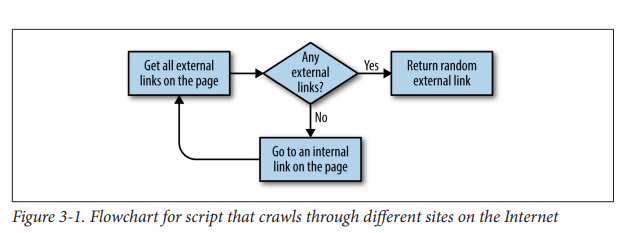


In [ ]:
# collects a list of all external URLs found on the site
allExtLinks=set()
allIntLinks=set()
def getAllExternalLinks(siteUrl):
    html=urlopen(siteUrl)
    bsObj=BeautifulSoup(html)
    internalLinks=getInternalLinks(bsObj,splitAddress(siteUrl)[0])
    externalLinks=getExternalLinks(bsObj,splitAddress(siteUrl)[0])
    for link in externalLinks:
        if link not in allExtLinks:
            allExtLinks.add(link)
            print(link)
    for link in internalLinks:
        if link not in allIntLinks:
            print("About to get link: "+link)
            allIntLinks.add(link)
            getAllExternalLinks(link)
getAllExternalLinks("http://oreilly.com")

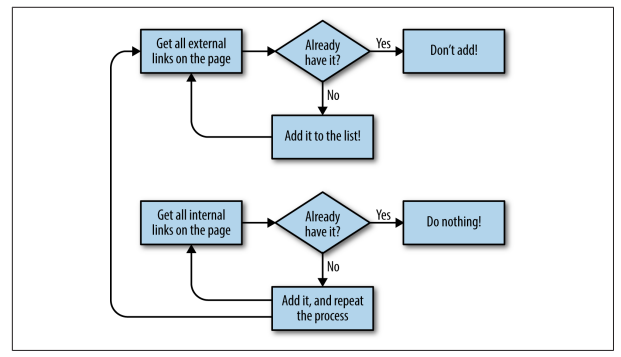


#### Crawling with Scrapy
Scrapy = python library which handles complexity of finding an evaluation links on a website, crawling domains or list of domains.  

# TO BE CONTINUE 

#### CHAPTER 4  
#### Using APIs
web application API: request made to an API via HTTP; API returns data in XML/JSON form

What's the difference between API and regular website?
Both using same protocol to fetch data (HTTP). API is extremely regulated syntax and API present their data as JSON/XML rather than HTML.



#### Methods  
* GET: ask info from server
* POST: submit info to the server (username/password etc)
* PUT: update something on the server
* DELETE: remove something from the server

#### Authentication
* provide token to API
* token can also be passed to server via cookie in request header

In [ ]:
token="<your api key>"
webRequest = urllib.request.Request("http://myapi.com", header={"token":token})
html=urlopen(webRequest)

#### Responses
common types:
1. eXtensible Markup Laungate (XML)
2. JavaScript Object Notation (JSON)

Why JSON?
1. smaller compare to XML data
2. shift in web technologies, framework such as Angular/Backbone find JSON easier to handle

#### API Calls
Example:
1. http://socialmediasite.com/users/1234/posts?form=08012014&to=08312014

    Explanation:  
    retrieve all post by user with ID 1234 during month of August 2014

2. http://socialmediasite.com/api/v4/json/users/1234/post?from=08012014&to=08312014

    Explanation:  
    path is used to specify API version and data type (for examplle json)

3. http://socialmediasite.com/users/1234/posts?format=json&from=08122014&to=08312014

    Explanation:  
    formating and API version information as a request parameter




#### Echo Nest  
http://developer.echonest.com/api/v4/artist/search?api_key=<your api key>&name=monty%20python

#### Twitter
* Twitter rate limit depending on types of calls:
    * 15 call per 15 minutes
    * 180 calls per 15 minutes

#### Getting started
* Getting API key (consumer key):
    * signup Twitter account
    * register new application on developer site


#### Example
* Twitter authentication uses OAuth
* Best to use available library to interact with the API instead of working with the API itself


In [ ]:
from twitter import Twitter
t=Twitter(auth=Oauth(<Acces Token>,<Access Token Secret>,<Consumer Key>,<Consumer Secret>))
pythonTweets= t.search.tweets(q='#python')
print(pythonTweets)

SyntaxError: ignored

In [ ]:
# output single tweet
from twitter import *
t=Twitter(auth=OAuth(<Access Token>,<Access Token Secret>,
                     <Consumer key>,<consumer secret>))
statusUpdate=t.statuses.update(status='Hello world!')
print(statusUpdate)

In [ ]:
# limit number of tweets received
pythonStatuses=t.statuses.user_timeline(screen_name='montypython',count=5)
print(pythonStatuses)



#### Google APIs
* Covers multiple subjects; language translation, geolocation, calendars, or even genomics.

#### Getting Started
* create API using Google Developers Console
* get API credentials

#### Example
* Map API:
    * street address
    * latitude/longitude coordinate
    * elevation

https://maps.googleapis.com/maps/api/geocode/json?address=1+Science+Park+Boston+MA+02114&key=<Your API key>

https://maps.googleapis.com/maps/api/timezone/json?location=42.3677994,-71.070807&timestamp=1412649030&key=<your API key>

https://maps.googleapis.com/maps/api/elevation/json?locaations=42.3677994,-71.07080788&key=<your API key>




#### Parsing JSON
http://freegeoip.net/json/50.78.253.58

## LOOKS LIKE THE WEBSITE IS SHUTDOWN, CARRY ON...


In [ ]:
import json
from urllib.request import urlopen

def getCountry(ipAddress):
    response=urlopen("http://freegeoip.net/json/"+ipAddress).read().decode('utf-8')
    responseJson=json.loads(response)
    return responseJson.get('country_code')

print(getCountry("50.78.253.58"))

JSONDecodeError: ignored

In [ ]:
import json

jsonString='{"arrayOfNums":[{"number":0},{"number":1},{"number":2}],"arrayOfFruits":[{"fruit":"apple"},{"fruit":"banana"},{"fruit":"pear"}]}'
jsonObj=json.loads(jsonString)

print(jsonObj.get("arrayOfNums"))
print(jsonObj.get("arrayOfNums")[1])
print(jsonObj.get("arrayOfNums")[1].get("number")+
      jsonObj.get("arrayOfNums")[2].get("number"))
print(jsonObj.get("arrayOfFruits")[2].get("fruit"))

[{'number': 0}, {'number': 1}, {'number': 2}]
{'number': 1}
3
pear


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random
import re

random.seed(datetime.datetime.now())
def getLinks(articleUrl):
    html=urlopen("http://en.wikipedia.org"+articleUrl)
    bsObj=BeautifulSoup(html)
    return bsObj.find("div",{"id":"bodyContent"}).findAll("a",
                      href=re.compile("^(/wiki/)((?!:).)*$"))

def getHistoryIPs(pageUrl):
    pageUrl=pageUrl.replace("/wiki/","")
    historyUrl="http://en.wikipedia.org/w/index.php?title="+pageUrl+"&action=history"
    print("history url is: "+historyUrl)
    html=urlopen(historyUrl)
    bsObj=BeautifulSoup(html)

    ipAddresses=bsObj.findAll("a",{"class":"mw-anounserlink"})
    addressList=set()
    for ipAddress in ipAddresses:
        addressList.add(ipAddress.get_text())
    return addressList

links=getLinks("/wiki/Python_(programming_language)")

while(len(links)>0):
    for link in links:
        print("-------------")
        historyIPs=getHistoryIPs(link.attrs['href'])
        for historyIP in historyIPs:
            print(historyIP)
    newLink=links[random.randint(0,len(links)-1)].attrs["href"]
    links=getLinks(newLink)

-------------
history url is: http://en.wikipedia.org/w/index.php?title=Programming_paradigm&action=history
-------------
history url is: http://en.wikipedia.org/w/index.php?title=Multi-paradigm_programming_language&action=history
-------------
history url is: http://en.wikipedia.org/w/index.php?title=Object-oriented_programming&action=history
-------------
history url is: http://en.wikipedia.org/w/index.php?title=Procedural_programming&action=history
-------------
history url is: http://en.wikipedia.org/w/index.php?title=Imperative_programming&action=history
-------------
history url is: http://en.wikipedia.org/w/index.php?title=Functional_programming&action=history
-------------
history url is: http://en.wikipedia.org/w/index.php?title=Structured_programming&action=history
-------------
history url is: http://en.wikipedia.org/w/index.php?title=Reflective_programming&action=history
-------------
history url is: http://en.wikipedia.org/w/index.php?title=Software_design&action=history
-

KeyboardInterrupt: ignored

## CAN'T CONTINUE BECAUSE freegeoip.net WEBSITE IS DOWN

#### CHAPTER 5
#### Storing Data
* Save the information that you scrap
* Three main methods of data management:
    * write to a database
    * create a file stream
    * Alerts through email for notification

#### Media Files
* Two main ways to store media files:
    * storing URL
    * download and store the file


In [5]:
from urllib.request import urlretrieve
from urllib.request import urlopen
from bs4 import BeautifulSoup

html=urlopen("http://www.pythonscraping.com")
bsObj=BeautifulSoup(html)
imageLocation=bsObj.find("img",{"class":"pagelayer-img pagelayer-wp-title-img"})["src"]
urlretrieve(imageLocation,"logo.jpg")

('logo.jpg', <http.client.HTTPMessage at 0x7f117b8b8950>)

In [15]:
import os
from urllib.request import urlopen
from urllib.request import urlretrieve
from bs4 import BeautifulSoup
downloadDirectory="downloaded"
baseUrl="http://python.scraping.com"

def getAbsoluteURL(baseUrl, source):
    if source.startswith("https://wwww."):
        url="https://"+source[11:]
    elif source.startswith("https://"):
        url=source
    elif source.startswith("www."):
        url=source[4:]
        url="https://"+source
    else:
        url=baseUrl+"/"+source
    if baseUrl not in url:
        return None
    return url

def getDownloadPath(baseUrl, absoluteUrl, downloadDirectory):
    path=absoluteUrl.replace("www.","")
    path=path.replace(baseUrl,"")
    path=downloadDirectory+path
    directory=os.path.dirname(path)

    if not os.path.exists(directory):
        os.makedirs(directory)
    
    return path

html=urlopen("http://www.pythonscraping.com")
bsObj=BeautifulSoup(html)
downloadList=bsObj.findAll(src=True)

for download in downloadList:
    fileUrl=getAbsoluteURL(baseUrl, download["src"])
    if fileUrl is not None:
        print(fileUrl)

urlretrieve(fileUrl, getDownloadPath(baseUrl, fileUrl, downloadDirectory))

AttributeError: ignored

#### Storing Data to CSV

In [11]:
import csv

csvFile=open("../files/test.csv","w+")
try:
    writer=csv.writer(csvFile)
    writer.writerow(("number","number plus 2","number times 2"))
    for i in range(10):
        writer.writerow((i,i+2,i*2))
finally:
    csvFile.close()

FileNotFoundError: ignored

In [14]:
import csv
from urllib.request import urlopen
from bs4 import BeautifulSoup

html=urlopen("http://en.wikipedia.org/wiki/Comparison_of_text_editors")
bsObj=BeautifulSoup(html)

table=bsObj.findAll("table",{"class":"wikitable"})[0]
rows=table.findAll("tr")

csvFile=open("../files/editors.csv",'wt')
writer=csv.writer(csvFile)

FileNotFoundError: ignored